#### Be2 PDFT Inversion - WuYang

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter

In [5]:
a = 4.522/2
#Nuclear charge for fragments A and B
Za, Zb = 4,4
#Set polarization 1-Unpolarized, 2-Polarized
pol = 1
#Fragment a electrons [alpha, beta]
Nmo_a = [[2]] #Number of molecular orbitals to calculate
N_a   = [[4]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[2]]
N_b   = [[4]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[4]]
N_m   = [[8]]


#Set up grid
NP = 7
NM = [6,6]
L = np.arccosh(15/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, { "kinetic_part_type" : "inversion",
                                                                          "ab_sym"            : True,
                                                                          "ens_spin_sym"      : False})
#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m, {"tol_orbital" : 1e-9})
part.inverter = Inverter(grid, mol_solver, {"invert_type"    : "wuyang", 
                                            "ab_sym"         : True,
                                            "ens_spin_sym"   : False,
                                            "tol_lin_solver" : 1e-3,
                                            "tol_invert"     : 1e-4,
                                            "res_factor"     : 0,
                                           })

part.optPartition.isolated = True
part.scf({"disp"  : False,
          "alpha" : [0.6],
          "e_tol" : 1e-7})

D0_frag_a = part.KSa.n.copy()
D0_frag_b = part.KSa.n.copy()

part.optPartition.isolated   = False
part.scf({"disp"       : True,
          "alpha"      : [0.3],
          "max_iter"   : 200,
          "e_tol"      : 1e-7,
          "continuing" : True, 
          "iterative"  : False})

# #Store full densities under the presence of vp.
Dvp_frag_a = part.KSa.n.copy()
Dvp_frag_b = part.KSb.n.copy()

----> Begin SCF calculation for *Interacting* Fragments

                Total Energy (a.u.)                                Inversion                

                __________________                ____________________________________     

Iteration         A              B                  iters      optimality        res       

___________________________________________________________________________________________ 

    1           -14.43315       -14.43315             5       +9.929e-02      +1.000e+00
    2           -14.43466       -14.43466             4       +2.091e-05      +1.556e-03
    3           -14.45966       -14.45966             4       +3.488e-04      +1.777e-03
    4           -14.43906       -14.43906             4       +7.463e-04      +1.847e-03
    5           -14.46721       -14.46721             3       +6.627e-03      +1.529e-03
    6           -14.44277       -14.44277             3       +2.213e-02      +1.032e-03
    7           -14.44361       -14

(-5.0, 5.0)

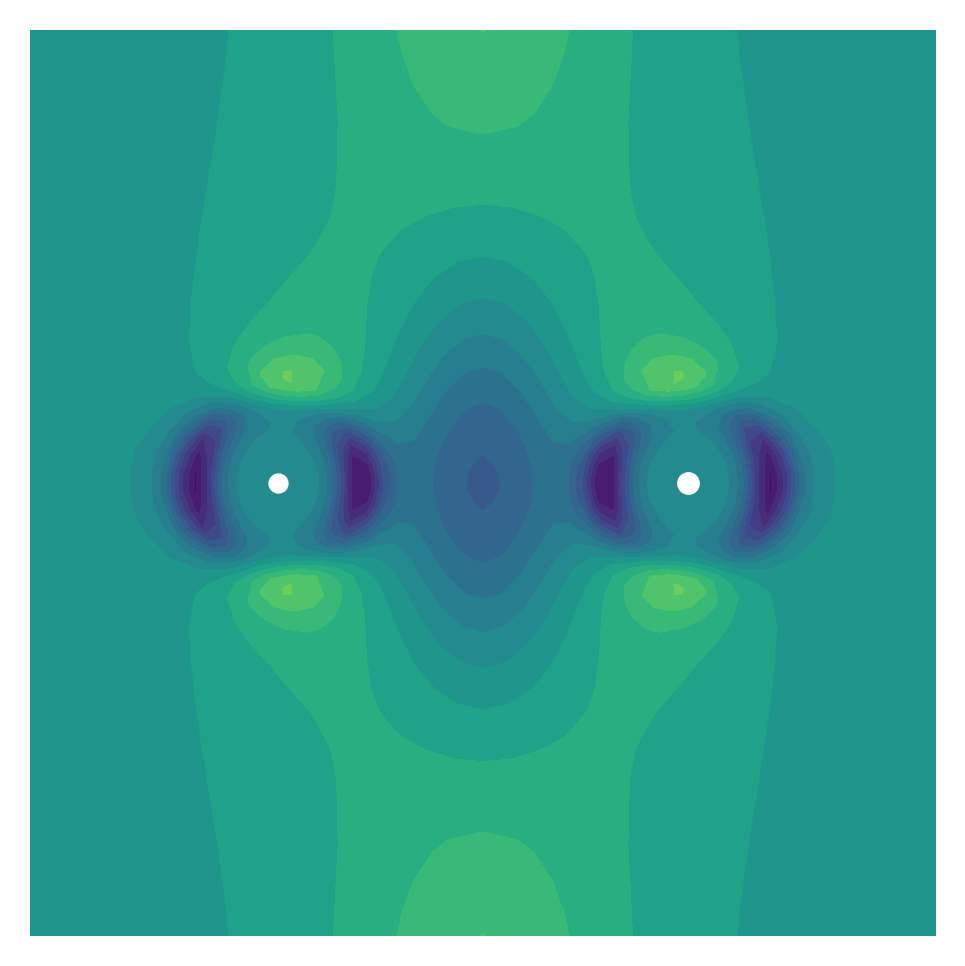

In [7]:
full, x,y = grid.plotter(part.V.vp[:,0])
fig, ax = plt.subplots(dpi=300)

#vmin=-0.3, vmax=0.3

plot = ax.contourf(x,y,full, levels=20, cmap="viridis")
ax.scatter(4.522/2, 0, color='white', s=20)
ax.scatter(-4.522/2, 0, color='white', s=15)

ax.axis('off')



ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# fig.colorbar(plot) 

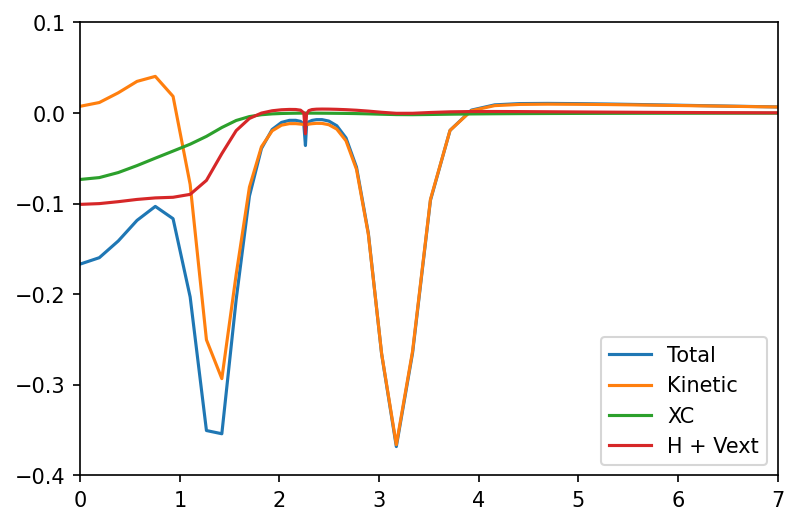

In [8]:
x_axis, vp      = grid.axis_plot(part.V.vp[:,0])
x_axis, vp_kin  = grid.axis_plot(part.V.vp_kin[:,0])
x_axis, vp_xc   = grid.axis_plot(part.V.vp_x[:,0] + part.V.vp_c[:,0] )
x_axis, vp_hext = grid.axis_plot( part.V.vp_h[:,0] + part.V.vp_pot[:,0])

fig, ax = plt.subplots(dpi=150)

ax.plot(x_axis, vp, label='Total')
ax.plot(x_axis, vp_kin, label='Kinetic')
ax.plot(x_axis, vp_xc, label='XC')
ax.plot(x_axis, vp_hext, label="H + Vext")

ax.set_xlim(0,7)
ax.set_ylim(-0.4, 0.1)

ax.legend()

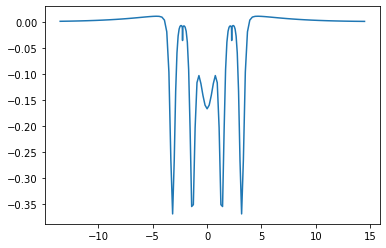

In [11]:
x = x_axis
plt.plot(x, vp)

In [19]:
# np.save('y.npy',  x)
# np.save('d1.npy', d1)
# np.save('d2.npy', d2)
np.save('vp.npy',vp)

In [15]:
x, d1      = grid.axis_plot(part.KSa.n[:,0])
x, d2      = grid.axis_plot(part.KSb.n[:,0])

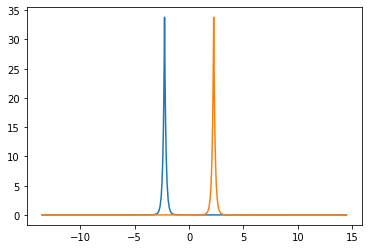

In [16]:
plt.plot(x, d1)
plt.plot(x, d2)